# Incidence de la varicelle en France

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [3]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

In [4]:
import os
os.getcwd()

'/home/jovyan/work/module3/exo2'

In [6]:
# if file does not exist, download and save
if not os.path.isfile(os.path.join('/home/jovyan/work/module3/exo2', 'my_csv.csv')):
    print("File has been downloaded !")
    raw_data = pd.read_csv(data_url, skiprows=1)
    raw_data.to_csv(os.path.join('/home/jovyan/work/module3/exo2', 'my_csv.csv'), index=False)
# if it exists just laod
else:
    print("File exists, just loaded it !")
    raw_data = pd.read_csv(os.path.join('/home/jovyan/work/module3/exo2', 'my_csv.csv'))

File has been downloaded !


In [7]:
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202522          7   6794     3595    9993      10           5   
1     202521          7   4516     2537    6495       7           4   
2     202520          7   3083     1535    4631       5           3   
3     202519          7   5084     1997    8171       8           3   
4     202518          7   5003     2718    7288       7           4   
5     202517          7   6246     3424    9068       9           5   
6     202516          7   6151     3193    9109       9           5   
7     202515          7   5557     3262    7852       8           5   
8     202514          7   4984     2858    7110       7           4   
9     202513          7   5964     3608    8320       9           5   
10    202512          7   3855     1995    5715       6           3   
11    202511          7   5878     2747    9009       9           4   
12    202510          7   2921     1421    4421       4           2   
13    202509          7   3381     1468    5294       5           2   
14    202508          7   2835     1286    4384       4           2   
15    202507          7   4502     2382    6622       7           4   
16    202506          7   3455     1958    4952       5           3   
17    202505          7   2087     1056    3118       3           1   
18    202504          7   6895     4466    9324      10           6   
19    202503          7   2462     1161    3763       4           2   
20    202502          7   5966     2757    9175       9           4   
21    202501          7   6059     2451    9667       9           4   
22    202452          7   4356     1776    6936       7           3   
23    202451          7   4670     2239    7101       7           3   
24    202450          7   7363     4438   10288      11           7   
25    202449          7   6077     3631    8523       9           5   
26    202448          7   4189     1454    6924       6           2   
27    202447          7   1931      726    3136       3           1   
28    202446          7   2260      863    3657       3           1   
29    202445          7   2713     1216    4210       4           2   
...      ...        ...    ...      ...     ...     ...         ...   
1770  199126          7  17608    11304   23912      31          20   
1771  199125          7  16169    10700   21638      28          18   
1772  199124          7  16171    10071   22271      28          17   
1773  199123          7  11947     7671   16223      21          13   
1774  199122          7  15452     9953   20951      27          17   
1775  199121          7  14903     8975   20831      26          16   
1776  199120          7  19053    12742   25364      34          23   
1777  199119          7  16739    11246   22232      29          19   
1778  199118          7  21385    13882   28888      38          25   
1779  199117          7  13462     8877   18047      24          16   
1780  199116          7  14857    10068   19646      26          18   
1781  199115          7  13975     9781   18169      25          18   
1782  199114          7  12265     7684   16846      22          14   
1783  199113          7   9567     6041   13093      17          11   
1784  199112          7  10864     7331   14397      19          13   
1785  199111          7  15574    11184   19964      27          19   
1786  199110          7  16643    11372   21914      29          20   
1787  199109          7  13741     8780   18702      24          15   
1788  199108          7  13289     8813   17765      23          15   
1789  199107          7  12337     8077   16597      22          15   
1790  199106          7  10877     7013   14741      19          12   
1791  199105          7  10442     6544   14340      18          11   
1792  199104          7   7913     4563   11263      14           8   
1793  199103          7  15387    10484   20290      27          18   
1794  199102          7  16277  

In [8]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [10]:
data = raw_data.copy()

no lines that are null or empty !

In [11]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [12]:
sorted_data = data.set_index('period').sort_index()

In [13]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Coherent with the fact that we have no empty line

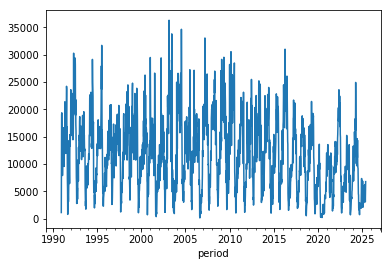

In [14]:
sorted_data['inc'].plot()

Already numerical, since no -

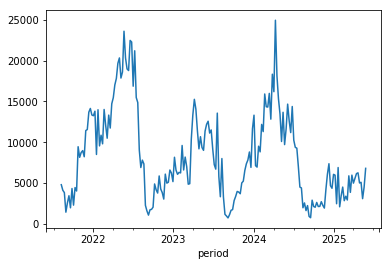

In [15]:
sorted_data['inc'][-200:].plot()

Weeks start the first september !

In [17]:
first_september_week = [pd.Period(pd.Timestamp(y, 11, 1), 'W')
                     for y in range(1992,
                                    sorted_data.index[-1].year)]

In [18]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

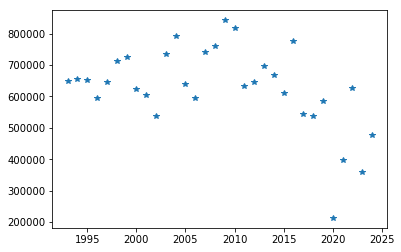

In [19]:
yearly_incidence.plot(style='*')

In [20]:
yearly_incidence.sort_values()

2020    212566
2023    359618
2021    396705
2024    476315
2002    537852
2018    539257
2017    543932
2019    584438
2006    594393
1996    595910
2001    605370
2015    610370
2000    623083
2022    627644
2011    634300
2005    639920
2012    645401
1997    647348
1993    650746
1995    651325
1994    656554
2014    669203
2013    696722
1998    713151
1999    724927
2003    736444
2007    742065
2008    760385
2016    775540
2004    794616
2010    819892
2009    843302
dtype: int64

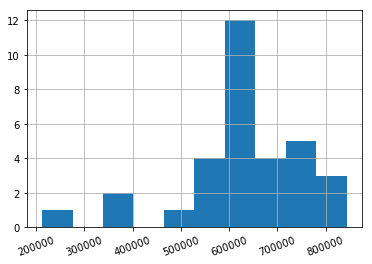

In [21]:
yearly_incidence.hist(xrot=20)